In [ ]:
!apt-get -qq install xxd
!pip install pandas numpy matplotlib
!pip install tensorflow==2.12.0rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 459.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 KB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 26.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-es

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



df = pd.read_csv("/content/sample_data/Blue.csv")
print(df.head())


      R     G     B
0  0.15  0.30  0.45
1  0.10  0.25  0.35
2  0.10  0.20  0.30
3  0.10  0.20  0.30
4  0.10  0.20  0.30


In [ ]:
# for col in df.columns:
#     print(col)
index = range(1, len(df['R']) + 1)
df.shape[0]

99

<ipython-input-4-57c5bcce089c>:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['R'], 'r.', label='r', linestyle='solid', marker=',')
<ipython-input-4-57c5bcce089c>:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['G'], 'g.', label='g', linestyle='solid', marker=',')
<ipython-input-4-57c5bcce089c>:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['B'], 'b.', label='b', linestyle='solid', marker=',')


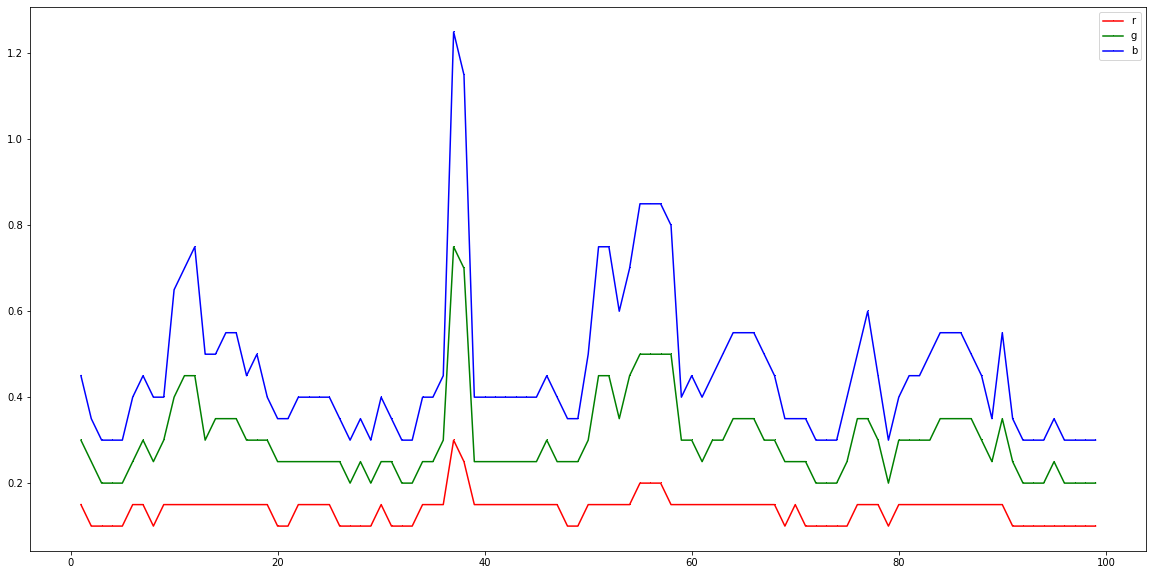

In [ ]:

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['R'], 'r.', label='r', linestyle='solid', marker=',')
plt.plot(index, df['G'], 'g.', label='g', linestyle='solid', marker=',')
plt.plot(index, df['B'], 'b.', label='b', linestyle='solid', marker=',')

plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of colors that data is available for
COLORS = [
    "Blue",
    "Green",
    "Red",
    "Yellow"
    ,"Brown"
    ,"White"

]

SAMPLES_PER_COLOR = 9

NUM_COLORS = len(COLORS)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_COLORS = np.eye(NUM_COLORS)

inputs = []
outputs = []

# read each csv file and push an input and output
for color_index in range(NUM_COLORS):
  color = COLORS[color_index]
  print(f"Processing index {color_index} for color '{color}'.")

  output = ONE_HOT_ENCODED_COLORS[color_index]
  print(output)
  df = pd.read_csv("/content/sample_data/" + color + ".csv")

  # calculate the number of color recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_COLOR)

  print(f"\tThere are {num_recordings} recordings of the {color} color.")

  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_COLOR):
      index = i * SAMPLES_PER_COLOR + j
      # print("index=",index)
      tensor = [
          (df['R'][index] ) ,
          (df['G'][index] ) ,
          (df['B'][index] )
      ]

      inputs.append(tensor)
      outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")

TensorFlow version = 2.12.0-rc1

Processing index 0 for color 'Ambient Light'.
[1. 0. 0. 0.]
	There are 11 recordings of the Ambient Light color.
Processing index 1 for color 'Blue'.
[0. 1. 0. 0.]
	There are 11 recordings of the Blue color.
Processing index 2 for color 'Green'.
[0. 0. 1. 0.]
	There are 11 recordings of the Green color.
Processing index 3 for color 'Red'.
[0. 0. 0. 1.]
	There are 11 recordings of the Red color.
Data set parsing and preparation complete.


In [ ]:
print(SAMPLES_PER_COLOR)

9


In [ ]:
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
#"TEST_SPLIT" variable to the sum of 60% of "num_inputs" and 20% of "num_inputs",
# which corresponds to 80% of the input tensors. This indicates that the next 20% of
# the input tensors will be used for validation, and the remaining 20% will be used for testing.
# The training set will be used to fit the parameters of the model, the validation set will be used to tune hyperparameters and prevent overfitting, and the testing set will be used to evaluate the performance of the model on unseen data.
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


In [ ]:
print(inputs.shape)
print(outputs.shape)

(396, 3)
(396, 4)


In [ ]:
print('select first firve rows: \n',inputs[30:50, :],outputs[30:50, :])

select first firve rows: 
 [[0.15 0.35 0.55]
 [0.1  0.45 0.25]
 [0.1  0.3  0.2 ]
 [0.2  0.5  0.85]
 [0.55 0.25 0.25]
 [0.05 0.05 0.05]
 [0.1  0.4  0.25]
 [0.15 0.25 0.4 ]
 [0.1  0.35 0.2 ]
 [0.1  0.45 0.25]
 [0.15 0.25 0.4 ]
 [0.1  0.4  0.25]
 [0.1  0.2  0.3 ]
 [0.1  0.35 0.2 ]
 [0.1  0.35 0.2 ]
 [0.1  0.4  0.25]
 [0.1  0.35 0.2 ]
 [0.05 0.05 0.05]
 [1.05 0.45 0.4 ]
 [0.15 0.3  0.45]] [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [ ]:
# build the model and train it

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_COLORS, activation='softmax'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=5, batch_size=1, validation_data=(inputs_validate, outputs_validate))

Epoch 1/5
237/237 [==============================] - 2s 5ms/step - loss: 0.1685 - mae: 0.3536 - val_loss: 0.1345 - val_mae: 0.3102
Epoch 2/5
237/237 [==============================] - 1s 6ms/step - loss: 0.1274 - mae: 0.2956 - val_loss: 0.0929 - val_mae: 0.2340
Epoch 3/5
237/237 [==============================] - 1s 4ms/step - loss: 0.0943 - mae: 0.2368 - val_loss: 0.0670 - val_mae: 0.1852
Epoch 4/5
237/237 [==============================] - 1s 4ms/step - loss: 0.0675 - mae: 0.1909 - val_loss: 0.0458 - val_mae: 0.1443
Epoch 5/5
237/237 [==============================] - 1s 4ms/step - loss: 0.0478 - mae: 0.1499 - val_loss: 0.0330 - val_mae: 0.1126


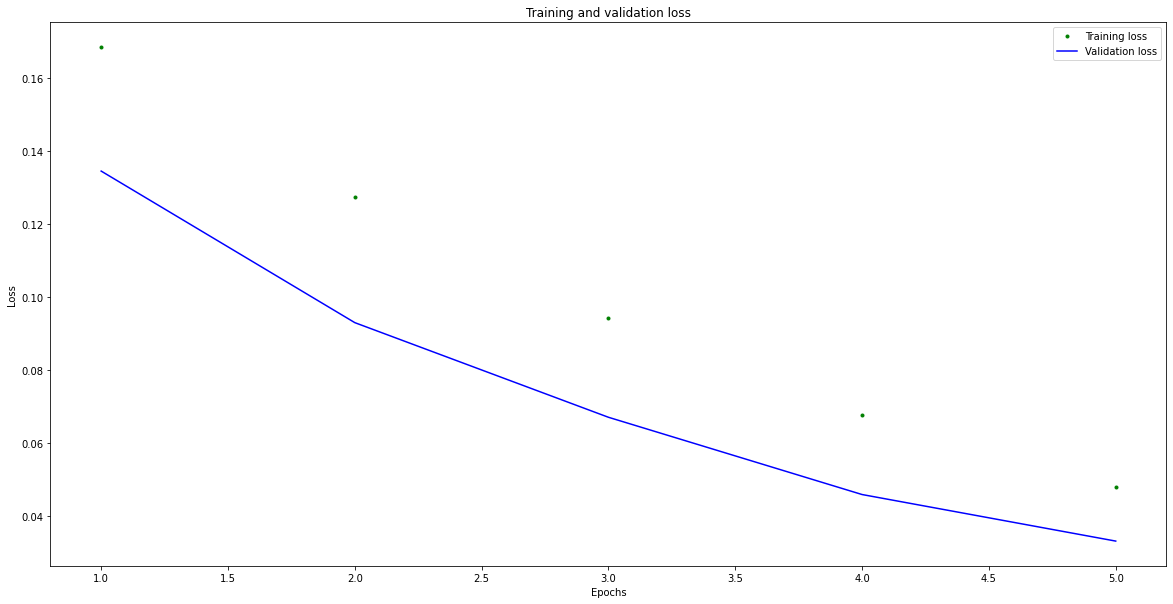

[20.0, 10.0]


In [ ]:
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

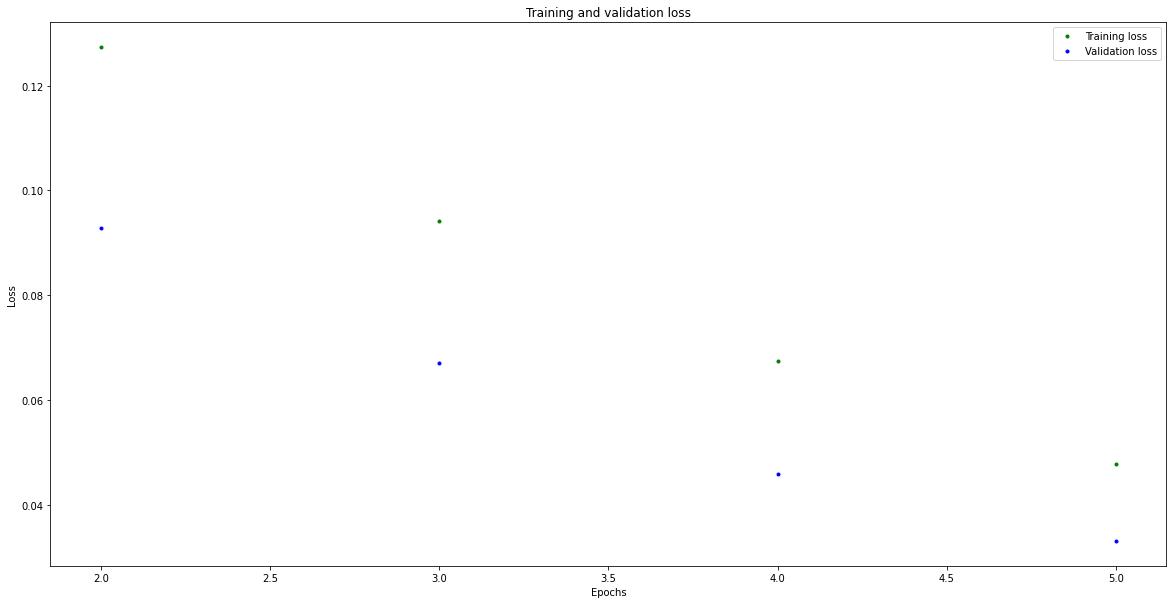

In [ ]:
SKIP = 1
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

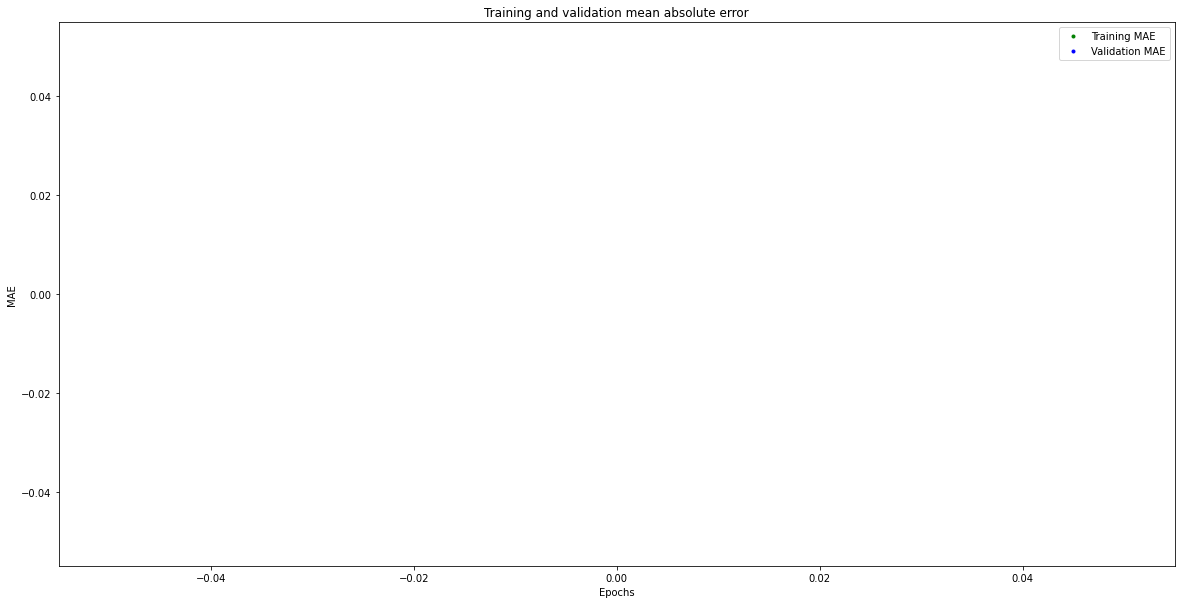

In [ ]:
# graph of mean absolute error
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [ ]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)



3/3 [==============================] - 0s 4ms/step
predictions =
 [[0.001 0.771 0.224 0.004]
 [0.08  0.47  0.403 0.048]
 [0.093 0.254 0.542 0.111]
 [0.029 0.545 0.395 0.03 ]
 [0.825 0.038 0.077 0.06 ]
 [0.037 0.315 0.573 0.075]
 [0.015 0.006 0.064 0.915]
 [0.093 0.254 0.542 0.111]
 [0.825 0.038 0.077 0.06 ]
 [0.825 0.038 0.077 0.06 ]
 [0.    0.85  0.149 0.001]
 [0.009 0.003 0.043 0.944]
 [0.033 0.485 0.433 0.049]
 [0.037 0.315 0.573 0.075]
 [0.029 0.545 0.395 0.03 ]
 [0.825 0.038 0.077 0.06 ]
 [0.026 0.295 0.605 0.073]
 [0.825 0.038 0.077 0.06 ]
 [0.825 0.038 0.077 0.06 ]
 [0.08  0.47  0.403 0.048]
 [0.037 0.315 0.573 0.075]
 [0.017 0.572 0.382 0.029]
 [0.825 0.038 0.077 0.06 ]
 [0.001 0.002 0.031 0.967]
 [0.129 0.263 0.498 0.11 ]
 [0.004 0.003 0.04  0.953]
 [0.009 0.003 0.043 0.944]
 [0.026 0.295 0.605 0.073]
 [0.026 0.295 0.605 0.073]
 [0.825 0.038 0.077 0.06 ]
 [0.825 0.038 0.077 0.06 ]
 [0.825 0.038 0.077 0.06 ]
 [0.093 0.254 0.542 0.111]
 [0.825 0.038 0.077 0.06 ]
 [0.093 0.254 0.

In [ ]:
print(inputs_test)
outputs_test

[[0.15 0.35 0.6 ]
 [0.1  0.2  0.3 ]
 [0.1  0.35 0.2 ]
 [0.1  0.25 0.35]
 [0.05 0.05 0.05]
 [0.1  0.4  0.25]
 [0.55 0.25 0.25]
 [0.1  0.35 0.2 ]
 [0.05 0.05 0.05]
 [0.05 0.05 0.05]
 [0.15 0.45 0.75]
 [0.6  0.25 0.25]
 [0.15 0.25 0.35]
 [0.1  0.4  0.25]
 [0.1  0.25 0.35]
 [0.05 0.05 0.05]
 [0.1  0.45 0.25]
 [0.05 0.05 0.05]
 [0.05 0.05 0.05]
 [0.1  0.2  0.3 ]
 [0.1  0.4  0.25]
 [0.15 0.25 0.4 ]
 [0.05 0.05 0.05]
 [0.75 0.4  0.35]
 [0.1  0.3  0.2 ]
 [0.65 0.3  0.3 ]
 [0.6  0.25 0.25]
 [0.1  0.45 0.25]
 [0.1  0.45 0.25]
 [0.05 0.05 0.05]
 [0.05 0.05 0.05]
 [0.05 0.05 0.05]
 [0.1  0.35 0.2 ]
 [0.05 0.05 0.05]
 [0.1  0.35 0.2 ]
 [0.1  0.2  0.3 ]
 [0.05 0.05 0.05]
 [0.15 0.25 0.4 ]
 [0.1  0.35 0.25]
 [0.05 0.05 0.05]
 [0.5  0.25 0.25]
 [0.05 0.05 0.05]
 [0.15 0.3  0.5 ]
 [0.1  0.25 0.35]
 [0.15 0.3  0.45]
 [0.1  0.35 0.2 ]
 [0.5  0.25 0.25]
 [0.1  0.3  0.2 ]
 [0.15 0.3  0.45]
 [0.05 0.05 0.05]
 [0.05 0.05 0.05]
 [0.1  0.45 0.25]
 [0.15 0.65 0.35]
 [0.8  0.35 0.35]
 [0.1  0.45 0.25]
 [0.1  0.4

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],


In [ ]:

from sklearn.metrics import accuracy_score
pred=predictions>0.5
accuracy_score(outputs_test,pred)

0.9113924050632911

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("color_model.tflite", "wb").write(tflite_model)

import os
basic_model_size = os.path.getsize("color_model.tflite")
print("Model is %d bytes" % basic_model_size)

Model is 6212 bytes


In [ ]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat color_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 38,342 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.
